In [1]:
%run eval.ipynb
import pickle
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from utils import eval, visual, save, save_model
from model import Model
import warnings
warnings.filterwarnings('ignore')

In [2]:
np.random.seed(42)
data = pd.read_csv('data/compound_feat0.csv').iloc[:,1:]
data['target'] = pd.qcut(data['label'], q=10, labels=False)
train_df, test_df = train_test_split(data, test_size=0.2, stratify=data['target'], random_state=43)


samples = train_df[train_df['label'] < 1.2]
train_df = pd.concat([train_df, samples], axis=0)
#train_df = pd.concat([train_df, samples], axis=0)
train_df = train_df.sample(frac=1).reset_index(drop=True)


train_df = train_df.drop(columns=['target'])
test_df = test_df.drop(columns=['target'])


X_train, y_train = train_df.iloc[:, :-1], train_df.iloc[:, -1:].values
X_test, y_test = test_df.iloc[:, :-1], test_df.iloc[:, -1:].values


print('train data:', X_train.shape)
print('X_test data:', X_test.shape)

train data: (54, 29)
X_test data: (10, 29)


# 1. DecisionTree_model

DecisionTree train: 
 r2: 1.0  rmse: 0.0  mse:0.0 error_ratio:0.0% mae:0.0
DecisionTree test: 
 r2: -0.10993509967666171  rmse: 0.43687526824026107 mse:0.19086000000000006 error_ratio:20.51% mae:0.314
save result successful！


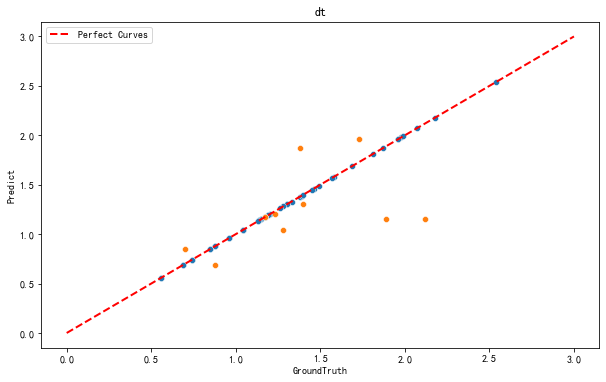

In [3]:

DecisionTree_model = DecisionTreeRegressor(random_state=25)


model = Model(DecisionTree_model, X_train, X_test, y_train, y_test, 'DecisionTree', '0')


visual(DecisionTree_model, 'dt', X_train, X_test, y_train, y_test)



DecisionTree_tuning train: 
 r2: 0.6153118500771932  rmse: 0.26291930481910386  mse:0.06912656084656085 error_ratio:16.72% mae:0.19139329805996474
DecisionTree_tuning test: 
 r2: -0.7281472626889895  rmse: 0.545128691872798 mse:0.29716529070294795 error_ratio:22.16% mae:0.359304761904762
save result successful！


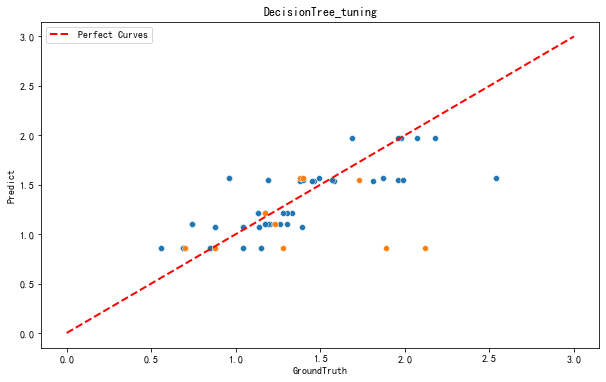

In [4]:
import numpy as np
from sklearn.model_selection import GridSearchCV


DT_param = {'max_depth':[3,5,7,9,10,11],
              'max_leaf_nodes':[25,30,40,50,60,70],
              'min_samples_leaf':[2,3,4,5,6,7,8],
}



D_model = DecisionTreeRegressor()
D_grid_search = GridSearchCV(D_model,DT_param,scoring='neg_mean_squared_error',cv=5)


model = Model(D_grid_search, X_train, X_test, y_train, y_test, 'DecisionTree_tuning', '0')

visual(model, 'DecisionTree_tuning', X_train, X_test, y_train, y_test)
    

# 2.RandomForest_model

RandomForest train: 
 r2: 0.9596985008897103  rmse: 0.08509982591269126  mse:0.007241980370370358 error_ratio:4.07% mae:0.05508888888888876
RandomForest test: 
 r2: 0.3094645781478985  rmse: 0.34458918874509104 mse:0.11874170899999999 error_ratio:14.97% mae:0.2181499999999999
save result successful！


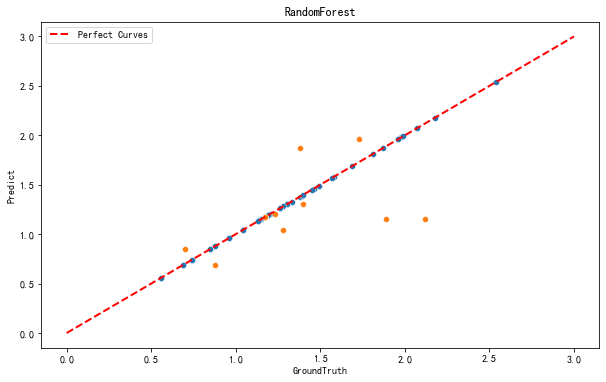

In [5]:

RandomForest_model =RandomForestRegressor(random_state=2024)  #n_estimators=300, max_depth=10, random_state=2023


model = Model(RandomForest_model, X_train, X_test, y_train, y_test, 'RandomForest', '0')



visual(DecisionTree_model, 'RandomForest', X_train, X_test, y_train, y_test)

RandomForest_tuning train: 
 r2: 0.9259952584555773  rmse: 0.11531819717641684  mse:0.013298286600018952 error_ratio:7.19% mae:0.08799261170059572
RandomForest_tuning test: 
 r2: 0.18488397644411603  rmse: 0.37438495021378143 mse:0.14016409094657561 error_ratio:16.63% mae:0.2400358025393568
save result successful！


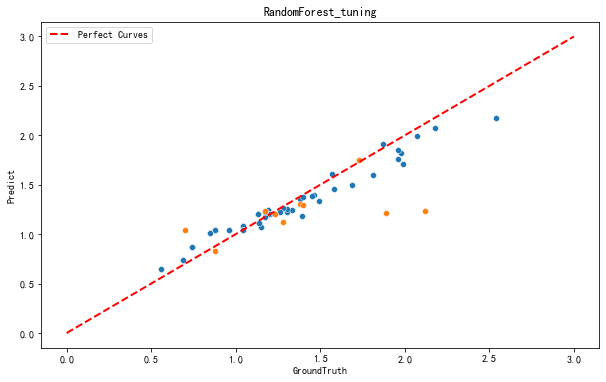

In [6]:


from sklearn.model_selection import GridSearchCV

rf_param = {
    'n_estimators': [300,400,500],
    'max_depth': [3,4,5],
#     'ccp_alpha': [0.0,0.05,0.1],
    'random_state': [2024]
}


rf_model = RandomForestRegressor(random_state=2024)


rf_grid_search = GridSearchCV(rf_model, rf_param, cv=5, scoring='neg_mean_squared_error')

model = Model(rf_grid_search, X_train, X_test, y_train, y_test, 'RandomForest_tuning', '0')


visual(model, 'RandomForest_tuning', X_train, X_test, y_train, y_test)

# 3. Linear_model

linear_reg train: 
 r2: 0.887784851590514  rmse: 0.14200178879261904  mse:0.02016450802030359 error_ratio:10.17% mae:0.10981693489161844
linear_reg test: 
 r2: -1.3010556324052964  rmse: 0.6290312570340882 mse:0.3956803223258852 error_ratio:25.07% mae:0.40854335333490865
save result successful！


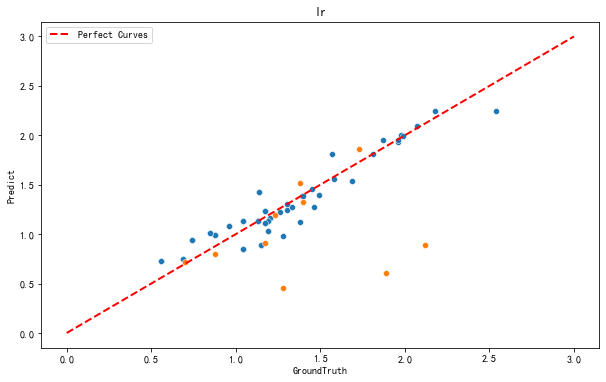

In [7]:

Linear_model = LinearRegression()

model = Model(Linear_model, X_train, X_test, y_train, y_test, 'linear_reg', '0')

visual(model, 'lr', X_train, X_test, y_train, y_test)

linear_reg_tuning train: 
 r2: 0.887784851590514  rmse: 0.14200178879261904  mse:0.02016450802030359 error_ratio:10.17% mae:0.10981693489161844
linear_reg_tuning test: 
 r2: -1.3010556324052964  rmse: 0.6290312570340882 mse:0.3956803223258852 error_ratio:25.07% mae:0.40854335333490865
save result successful！


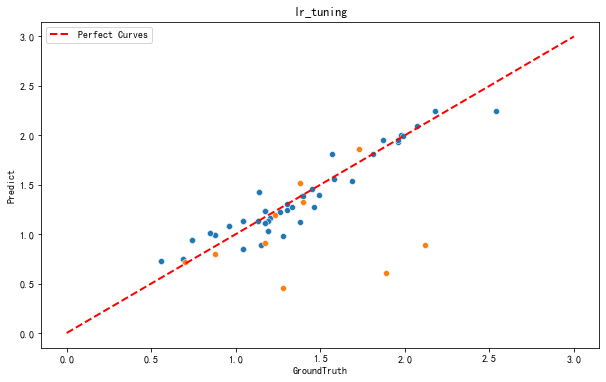

In [8]:
from sklearn.model_selection import GridSearchCV

L_para = {'fit_intercept': [True, False],  
          'normalize': [True, False],       
    
}

L_model = LinearRegression()
L_grid_search = GridSearchCV(L_model,L_para,scoring='neg_mean_squared_error',cv=5)

model = Model(L_grid_search, X_train, X_test, y_train, y_test, 'linear_reg_tuning', '0')

visual(model, 'lr_tuning', X_train, X_test, y_train, y_test)
    

# 4. Lasso

lasso train: 
 r2: 0.30799442896893015  rmse: 0.3526329306840491  mse:0.12434998380282136 error_ratio:25.1% mae:0.27847071788458416
lasso test: 
 r2: 0.04903752667019068  rmse: 0.4043806413070496 mse:0.1635237030639007 error_ratio:26.46% mae:0.33203304223135544
save result successful！


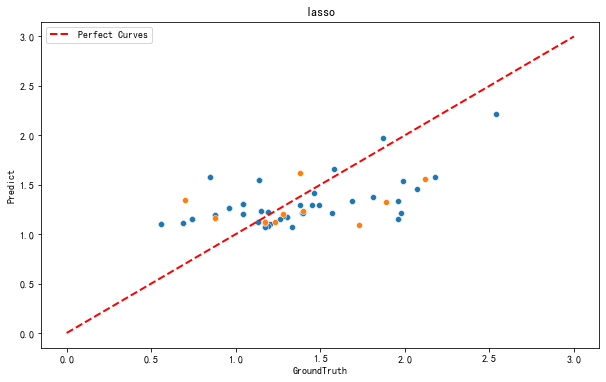

In [4]:

from sklearn.linear_model import Lasso
lasso_model = Lasso(random_state=2024)  


model = Model(lasso_model, X_train, X_test, y_train, y_test, 'lasso', '0')


visual(model, 'lasso', X_train, X_test, y_train, y_test)

lasso_tuning train: 
 r2: 0.653134842592402  rmse: 0.24965968010831827  mse:0.0623299558717878 error_ratio:16.49% mae:0.18788780809705768
lasso_tuning test: 
 r2: -0.007222134745729081  rmse: 0.41617050520470167 mse:0.1731978894023366 error_ratio:20.81% mae:0.29963567143574
save result successful！


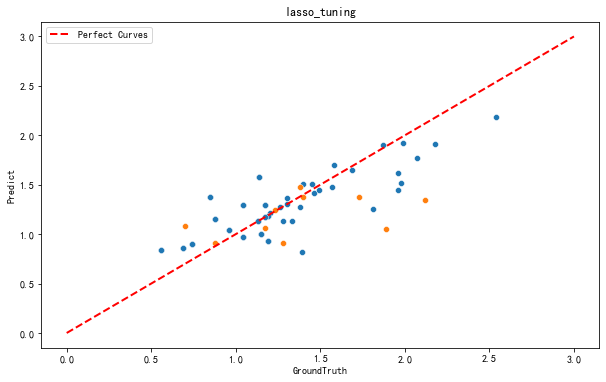

In [5]:
from sklearn.model_selection import GridSearchCV

La_para = {'alpha': [0.001,0.005,0.05],
           'selection': ['cyclic']
}

La_model = Lasso(random_state=2024)
La_grid_search = GridSearchCV(La_model,La_para,scoring='neg_mean_squared_error',cv=5)
La_grid_search.fit(X_train, y_train)


model = Model(La_grid_search, X_train, X_test, y_train, y_test, 'lasso_tuning', '0')

# 可视化
visual(model, 'lasso_tuning', X_train, X_test, y_train, y_test)

# 5. ridge_model

ridge train: 
 r2: 0.7608789930997379  rmse: 0.2072893246057273  mse:0.04296886409549858 error_ratio:13.76% mae:0.15588035320628055
ridge test: 
 r2: 0.21850109180016086  rmse: 0.3665834506062863 mse:0.13438342625841154 error_ratio:18.08% mae:0.25864381409317294
save result successful！


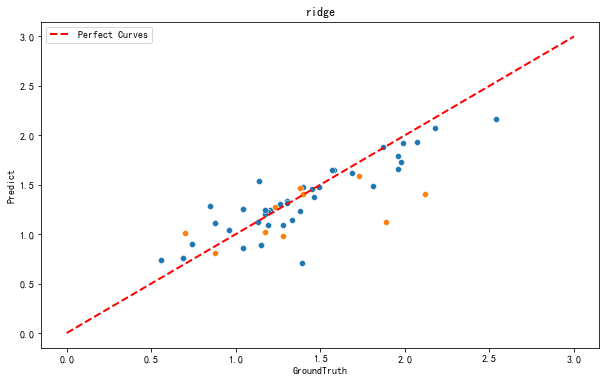

In [6]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(random_state=2024, alpha=5)  # alpha=0.5 

model = Model(ridge_model, X_train, X_test, y_train, y_test, 'ridge', '0')

visual(model, 'ridge', X_train, X_test, y_train, y_test)

ridge_tuning train: 
 r2: 0.7381317889162216  rmse: 0.21692492792531698  mse:0.04705642435540396 error_ratio:14.53% mae:0.16526571603715137
ridge_tuning test: 
 r2: 0.19000035963682105  rmse: 0.3732081164153465 mse:0.13928429815829083 error_ratio:18.6% mae:0.26518046323100786
save result successful！


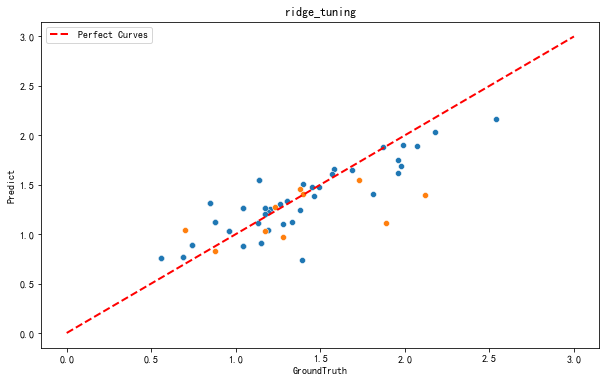

In [7]:
from sklearn.model_selection import GridSearchCV

R_para = {
    'alpha': [0.001, 0.01,0.1,0.5,5,10],  
}

R_model = Ridge(random_state=2024)
R_grid_search = GridSearchCV(R_model,R_para,scoring='neg_mean_squared_error',cv=5)

R_grid_search.fit(X_train, y_train)


model = Model(R_grid_search, X_train, X_test, y_train, y_test, 'ridge_tuning', '0')


visual(model, 'ridge_tuning', X_train, X_test, y_train, y_test)

# 6. svm_model

svm train: 
 r2: 0.7788318542259451  rmse: 0.19935602224970145  mse:0.03974282360722346 error_ratio:13.06% mae:0.14407786205075995
svm test: 
 r2: -0.9829159577025883  rmse: 0.5839300441171924 mse:0.3409742964227063 error_ratio:25.83% mae:0.39388551378695164
save result successful！


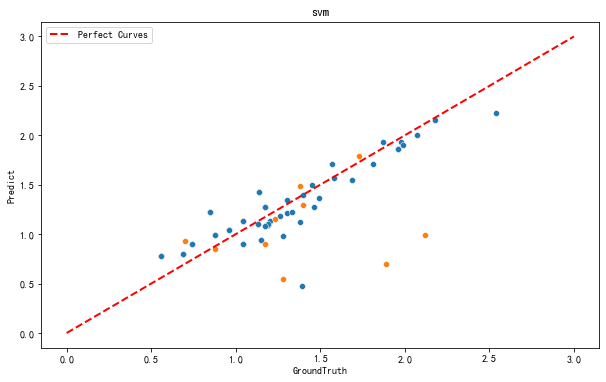

In [13]:
from sklearn import svm
svm_model = svm.SVR(kernel='linear',degree=1,gamma='scale',tol=0.001)

model = Model(svm_model, X_train, X_test, y_train, y_test, 'svm', '0')

visual(model, 'svm', X_train, X_test, y_train, y_test)

svm_tuning train: 
 r2: 0.710506029335197  rmse: 0.2280803299905758  mse:0.05202063692860995 error_ratio:12.22% mae:0.1614214824096443
svm_tuning test: 
 r2: -0.46481609405483626  rmse: 0.5018803804386992 mse:0.25188391626929346 error_ratio:25.44% mae:0.35109988860027086
save result successful！


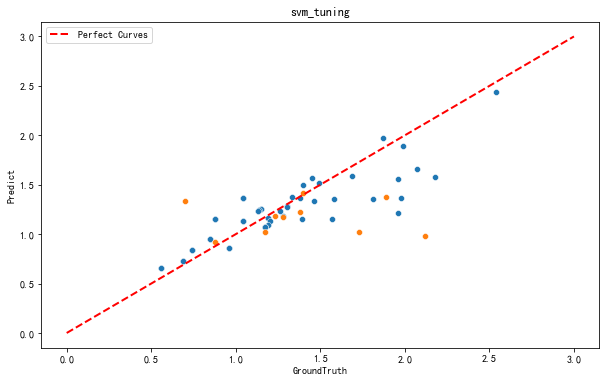

In [14]:
from sklearn.model_selection import GridSearchCV

S_model = svm.SVR()

S_para = {
     'C': [0.1, 1, 10],
    'tol': [0.001, 0.002],
}


S_grid_search = GridSearchCV(S_model,S_para,scoring='neg_mean_squared_error',cv=5)

model = Model(S_grid_search, X_train, X_test, y_train, y_test, 'svm_tuning', '0')

visual(model, 'svm_tuning', X_train, X_test, y_train, y_test)


# 7. elastic net

elastic_net train: 
 r2: 0.35178591526096514  rmse: 0.3412929386471334  mse:0.11648086997039597 error_ratio:24.87% mae:0.27502202302037
elastic_net test: 
 r2: -0.049229177875354635  rmse: 0.4247602294362486 mse:0.18042125251073451 error_ratio:27.04% mae:0.35464270712950563
save result successful！


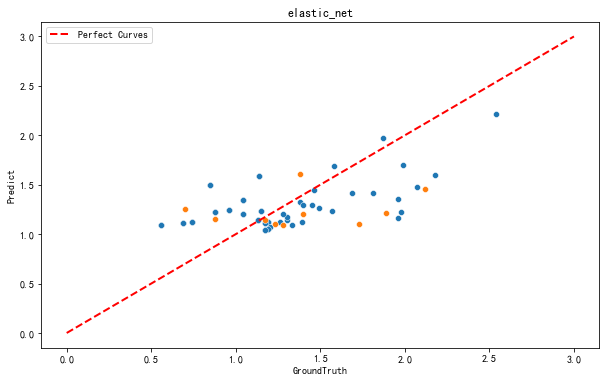

In [8]:
from sklearn.linear_model import ElasticNet

elastic_model = ElasticNet(random_state=2024)   # selection='cyclic'

model = Model(elastic_model, X_train, X_test, y_train, y_test, 'elastic_net', '0')

visual(model, 'elastic_net', X_train, X_test, y_train, y_test)

elastic_net_tuning train: 
 r2: 0.3112459906234878  rmse: 0.35180348808758555  mse:0.12376569423059193 error_ratio:25.07% mae:0.27807998820481566
elastic_net_tuning test: 
 r2: 0.04787399650190616  rmse: 0.40462795140414887 mse:0.16372377905751825 error_ratio:26.5% mae:0.33252498985687257
save result successful！


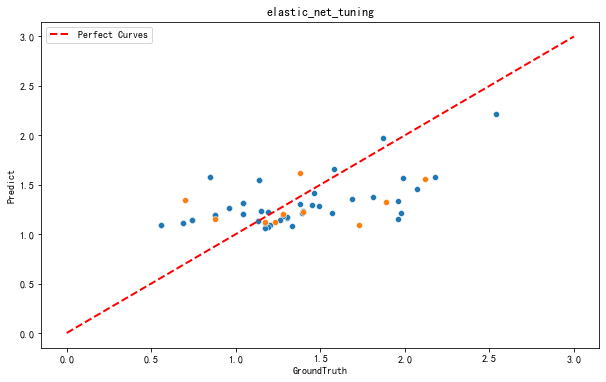

In [9]:
from sklearn.linear_model import ElasticNet

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import numpy as np
from sklearn.model_selection import GridSearchCV



EN_para = {
    'alpha': [0,0.1,0.5,1],          
    'l1_ratio': [0.0001,0.001,0.005,0.05,0.1,0.5,0.9],      
}

EN_model = ElasticNet()
EN_grid_search = GridSearchCV(EN_model,EN_para,scoring='neg_mean_squared_error', cv=5)

EN_grid_search.fit(X_train, y_train)


model = Model(EN_grid_search, X_train, X_test, y_train, y_test, 'elastic_net_tuning', '0')

visual(model, 'elastic_net_tuning', X_train, X_test, y_train, y_test)

# 8. gaussian_process

gaussian train: 
 r2: 0.9993145869294108  rmse: 0.011097988287477326  mse:0.00012316534402898393 error_ratio:0.68% mae:0.00945857454558225
gaussian test: 
 r2: -11.04284817046221  rmse: 1.4390413475644124 mse:2.07084 error_ratio:100.0% mae:1.3779999999999997
save result successful！


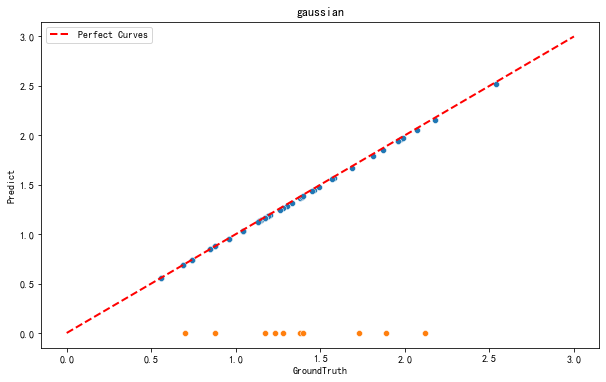

In [23]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel
from sklearn.model_selection import GridSearchCV

gaussian_model = GaussianProcessRegressor(kernel = 1.0 * RBF(length_scale=1.0), alpha=0.02, random_state=2024)

model = Model(gaussian_model, X_train, X_test, y_train, y_test, 'gaussian', '0')


visual(model, 'gaussian', X_train, X_test, y_train, y_test)

GaussianProcessRegressor_tuning train: 
 r2: 0.9998287400731037  rmse: 0.005547482594405311  mse:3.0774563135229874e-05 error_ratio:0.34% mae:0.004726081741153109
GaussianProcessRegressor_tuning test: 
 r2: -11.04284817046221  rmse: 1.4390413475644124 mse:2.07084 error_ratio:100.0% mae:1.3779999999999997
save result successful！


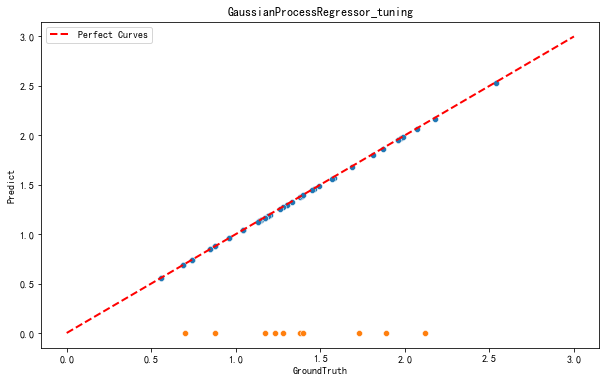

In [18]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern
from sklearn.model_selection import GridSearchCV


kernel_1 = 1 * RBF(length_scale=1)
kernel_2 = 1.0 * Matern(length_scale=1.0, nu=1.5)

GS_grid = {
    "kernel": [kernel_1],
    "alpha": [0.01,0.02,0.03],
#     "n_restarts_optimizer": [1],
    'random_state':[2024],
}


gpr = GaussianProcessRegressor()

GS_grid_search = GridSearchCV(gpr, GS_grid, scoring='neg_mean_squared_error', cv=5)

model = Model(GS_grid_search, X_train, X_test, y_train, y_test, 'GaussianProcessRegressor_tuning', '0')

visual(model, 'GaussianProcessRegressor_tuning', X_train, X_test, y_train, y_test)

# 9. KNN

knn train: 
 r2: 0.43027144751396396  rmse: 0.31996469712674147  mse:0.10237740740740742 error_ratio:16.03% mae:0.21596296296296294
knn test: 
 r2: -0.08454488357486811  rmse: 0.4318495108252411 mse:0.18649400000000002 error_ratio:23.99% mae:0.3054
save result successful！


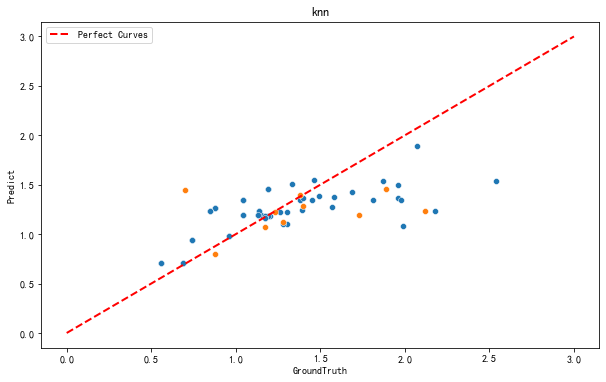

In [10]:
from sklearn.neighbors import KNeighborsRegressor

KNeighbors_model = KNeighborsRegressor()

model = Model(KNeighbors_model, X_train, X_test, y_train, y_test, 'knn', '0')

visual(model, 'knn', X_train, X_test, y_train, y_test)

knn_tuning train: 
 r2: 1.0  rmse: 0.0  mse:0.0 error_ratio:0.0% mae:0.0
knn_tuning test: 
 r2: -0.1368984117805987  rmse: 0.4421498651997359 mse:0.19549650329614465 error_ratio:23.87% mae:0.30066300922547146
save result successful！


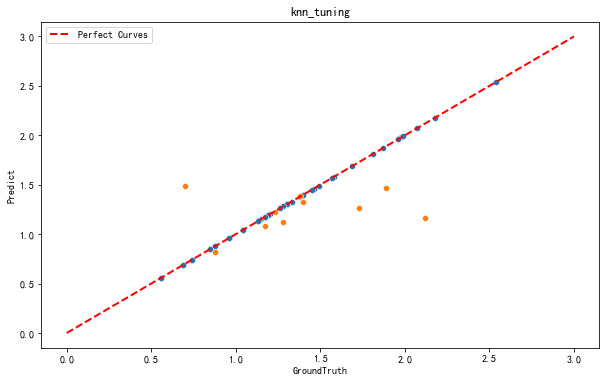

In [11]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process.kernels import RBF, Matern
from sklearn.model_selection import GridSearchCV

knn_grid = {
    'n_neighbors': [3,4,5],
    'weights': ['uniform', 'distance'],
#     'metric': ['euclidean', 'manhattan']
    'p': [1, 2],
}


knn = KNeighborsRegressor()

knn_grid_search = GridSearchCV(knn, knn_grid, scoring='neg_mean_squared_error', cv=5)

knn_grid_search.fit(X_train, y_train)


model = Model(knn_grid_search, X_train, X_test, y_train, y_test, 'knn_tuning', '0')

visual(model, 'knn_tuning', X_train, X_test, y_train, y_test)


In [20]:
KNeighborsRegressor?

# 10.XGBoost 

XGBoost train: 
 r2: 0.9999679510791551  rmse: 0.0023997984935308298  mse:5.759032809552841e-06 error_ratio:0.12% mae:0.001492753646991883
XGBoost test: 
 r2: -0.03978012868361325  rmse: 0.42284327097391466 mse:0.17879643180791943 error_ratio:19.12% mae:0.2875356087684632
save result successful！


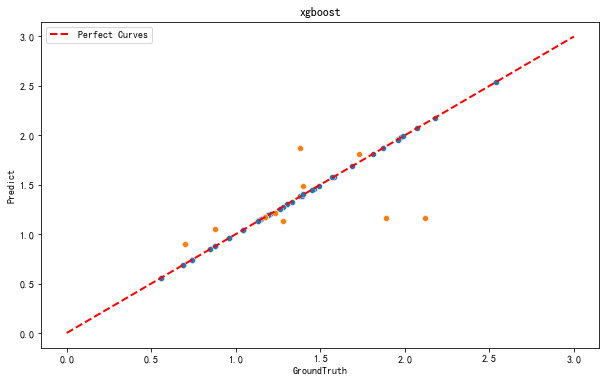

In [4]:
import xgboost as xgb
from xgboost import XGBRegressor

XGBoost_model = XGBRegressor(random_state=2024)

model = Model(XGBoost_model, X_train, X_test, y_train, y_test, 'XGBoost', '0')

visual(model, 'xgboost', X_train, X_test, y_train, y_test)

XGBoost_tuning train: 
 r2: 0.9694968239629405  rmse: 0.07403560022645528  mse:0.005481270100891505 error_ratio:4.3% mae:0.053683506206229886
XGBoost_tuning test: 
 r2: 0.27683473828361405  rmse: 0.35263664832757086 mse:0.12435260574370288 error_ratio:12.8% mae:0.21321034502983097
save result successful！


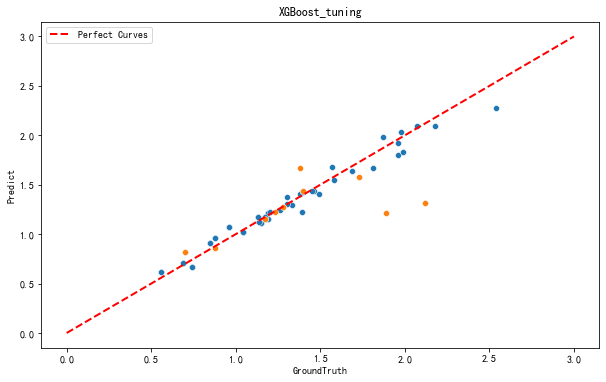

In [14]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
X_grid = {
    'n_estimators': [20,30,40],
    'max_depth': [2,3,4],
    'random_state':[2024],
    'subsample': [0.7,0.75],
    'reg_alpha': [0.1,0.2],
#     'reg_lambda': [0.1],
#     'colsample_bytree': [0.]
    
}

X_model = XGBRegressor()

X_grid_search = GridSearchCV(X_model,X_grid,scoring='neg_mean_squared_error',cv=5)

X_grid_search.fit(X_train, y_train)


model = Model(X_grid_search, X_train, X_test, y_train, y_test, 'XGBoost_tuning', '0')

visual(model, 'XGBoost_tuning', X_train, X_test, y_train, y_test)